In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential
from keras.layers import Dense
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import seaborn as sns
from sklearn.linear_model import LinearRegression


In [ ]:
df = pd.read_excel('/content/0_Lucknow_Data_Nov2022_All_Sensor.xlsx')
df

,Timestamp,IITK01,IITK02,IITK03,IITK04,IITK06,IITK07,IITK08,IITK10,IITK11,...,IITK67,IITK68,IITK69,IITK70,IITK71,IITK72,IITK73,IITK74,IITK75,IITK76
0,2022-01-11 00:00:00,NaN,147.00,165.50,217.25,88.00,145.00,127.75,108.00,204.00,...,201.25,184.50,219.000000,136.00,163.25,127.250000,102.25,148.50,125.25,159.00
1,2022-01-11 01:00:00,NaN,129.25,150.25,201.50,87.50,131.00,112.25,86.00,181.75,...,179.25,165.50,182.500000,120.50,151.00,124.750000,90.75,148.25,NaN,155.25
2,2022-01-11 02:00:00,NaN,113.00,167.75,160.75,85.75,118.75,99.00,89.00,173.50,...,164.75,134.50,157.500000,96.25,139.75,122.000000,89.25,NaN,116.00,150.75
3,2022-01-11 03:00:00,NaN,95.25,169.00,134.25,86.00,115.00,118.25,86.25,172.50,...,160.75,123.50,143.750000,106.50,133.25,118.333333,81.75,NaN,112.50,153.25
4,2022-01-11 04:00:00,NaN,83.00,174.50,116.00,82.00,120.75,107.50,83.75,140.00,...,157.00,108.75,139.000000,99.50,122.75,110.000000,77.25,NaN,109.00,147.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,30-11-2022 19:00,NaN,111.50,181.00,154.50,92.75,271.75,NaN,102.50,200.25,...,NaN,NaN,144.500000,155.25,184.25,149.666667,103.50,NaN,318.50,303.25
716,30-11-2022 20:00,NaN,115.50,205.25,173.75,117.50,300.25,NaN,117.50,213.50,...,NaN,NaN,172.500000,163.00,196.75,137.500000,113.50,NaN,241.00,224.00
717,30-11-2022 21:00,NaN,112.50,225.75,178.50,134.75,343.75,NaN,122.50,236.25,...,NaN,NaN,180.666667,156.25,195.75,122.333333,117.25,201.00,243.75,181.50
718,30-11-2022 22:00,NaN,125.25,265.75,169.25,143.50,327.00,NaN,120.50,224.50,...,NaN,NaN,179.250000,166.75,191.75,127.500000,121.25,188.00,220.25,220.00


In [ ]:
df.columns

Index(['Timestamp', 'IITK01', 'IITK02', 'IITK03', 'IITK04', 'IITK06', 'IITK07',
       'IITK08', 'IITK10', 'IITK11', 'IITK12', 'IITK13', 'IITK14', 'IITK15',
       'IITK17', 'IITK18', 'IITK19', 'IITK20', 'IITK21', 'IITK22', 'IITK23',
       'IITK24', 'IITK25', 'IITK26', 'IITK28', 'IITK29', 'IITK30', 'IITK31',
       'IITK32', 'IITK33', 'IITK34', 'IITK35', 'IITK36', 'IITK37', 'IITK38',
       'IITK40', 'IITK41', 'IITK42', 'IITK43', 'IITK44', 'IITK45', 'IITK46',
       'IITK47', 'IITK48', 'IITK49', 'IITK50', 'IITK51', 'IITK52', 'IITK53',
       'IITK54', 'IITK55', 'IITK56', 'IITK57', 'IITK58', 'IITK59', 'IITK60',
       'IITK61', 'IITK62', 'IITK63', 'IITK64', 'IITK65', 'IITK66', 'IITK67',
       'IITK68', 'IITK69', 'IITK70', 'IITK71', 'IITK72', 'IITK73', 'IITK74',
       'IITK75', 'IITK76'],
      dtype='object')

In [ ]:
data = pd.read_excel('/content/All_Sensor_Lucknow_Data_Sep_Oct_Nov2022_Aseem.xlsx')
data

,Timestamp,IITK01,IITK02,IITK03,IITK04,IITK06,IITK07,IITK08,IITK10,IITK11,...,IITK67,IITK68,IITK69,IITK70,IITK71,IITK72,IITK73,IITK74,IITK75,IITK76
0,2022-01-09 00:00:00,10.0,15.00,13.25,15.25,15.25,NaN,13.75,16.25,16.25,...,16.250000,15.25,18.000000,13.000000,18.25,18.500000,NaN,NaN,16.50,15.00
1,2022-01-09 01:00:00,10.0,15.50,14.25,15.75,14.50,NaN,13.50,13.50,18.25,...,16.333333,15.50,18.000000,14.333333,18.75,19.000000,NaN,NaN,16.50,15.50
2,2022-01-09 02:00:00,11.5,15.00,15.50,16.75,14.25,NaN,15.50,14.00,20.75,...,17.000000,15.00,18.750000,12.750000,18.00,19.000000,NaN,NaN,17.00,19.00
3,2022-01-09 03:00:00,NaN,16.75,16.00,16.50,16.00,NaN,17.50,17.00,20.75,...,18.750000,16.00,19.000000,13.250000,18.75,19.500000,NaN,NaN,18.00,19.50
4,2022-01-09 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.25,...,NaN,NaN,NaN,14.750000,20.25,NaN,NaN,NaN,NaN,21.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,30-11-2022 19:00,NaN,111.50,181.00,154.50,92.75,271.75,NaN,102.50,200.25,...,NaN,NaN,144.500000,155.250000,184.25,149.666667,103.50,NaN,318.50,303.25
2178,30-11-2022 20:00,NaN,115.50,205.25,173.75,117.50,300.25,NaN,117.50,213.50,...,NaN,NaN,172.500000,163.000000,196.75,137.500000,113.50,NaN,241.00,224.00
2179,30-11-2022 21:00,NaN,112.50,225.75,178.50,134.75,343.75,NaN,122.50,236.25,...,NaN,NaN,180.666667,156.250000,195.75,122.333333,117.25,201.00,243.75,181.50
2180,30-11-2022 22:00,NaN,125.25,265.75,169.25,143.50,327.00,NaN,120.50,224.50,...,NaN,NaN,179.250000,166.750000,191.75,127.500000,121.25,188.00,220.25,220.00


In [ ]:
data.columns

Index(['Timestamp', 'IITK01', 'IITK02', 'IITK03', 'IITK04', 'IITK06', 'IITK07',
       'IITK08', 'IITK10', 'IITK11', 'IITK12', 'IITK13', 'IITK14', 'IITK15',
       'IITK17', 'IITK18', 'IITK19', 'IITK20', 'IITK21', 'IITK22', 'IITK23',
       'IITK24', 'IITK25', 'IITK26', 'IITK28', 'IITK29', 'IITK30', 'IITK31',
       'IITK32', 'IITK33', 'IITK34', 'IITK35', 'IITK36', 'IITK37', 'IITK38',
       'IITK40', 'IITK41', 'IITK42', 'IITK43', 'IITK44', 'IITK45', 'IITK46',
       'IITK47', 'IITK48', 'IITK49', 'IITK50', 'IITK51', 'IITK52', 'IITK53',
       'IITK54', 'IITK55', 'IITK56', 'IITK57', 'IITK58', 'IITK59', 'IITK60',
       'IITK61', 'IITK62', 'IITK63', 'IITK64', 'IITK65', 'IITK66', 'IITK67',
       'IITK68', 'IITK69', 'IITK70', 'IITK71', 'IITK72', 'IITK73', 'IITK74',
       'IITK75', 'IITK76'],
      dtype='object')

In [ ]:
data_props = pd.read_excel('/content/Deployment_Lucknow_Lat_lon_Startdate.xlsx')
data_props

,S.No,Sensor No.,Serial No.,Location,Latitude,Longitude,Date of Installation
0,1,IITK-01,81432131001,Transport Nagar,26.779170,80.885063,2021-12-13 00:00:00
1,2,IITK-02,81432131016,Jankipuram,26.915201,80.942171,2021-12-11 00:00:00
2,3,IITK-03,81432131006,Nishat Ganj,26.865388,80.954702,2021-12-11 00:00:00
3,4,IITK-04,81432130003,Aliganj,26.901733,80.951876,2021-12-11 00:00:00
4,5,IITK-06,81432131013,Kakori,26.519931,80.235688,2021-12-20 00:00:00
...,...,...,...,...,...,...,...
68,69,IITK72,81432144025,Baksi Ka Talab,27.001078,80.883727,2022-02-09 00:00:00
69,70,IITK73,81432144026,Itaunja,27.067285,80.895013,2022-02-09 00:00:00
70,71,IITK74,81432144027,CIMAP,26.894830,80.982485,2022-02-04 00:00:00
71,72,IITK75,81432144030,Gomti Nagar Ex,26.840405,81.009441,2022-02-25 00:00:00


In [ ]:
data_props.columns

Index(['S.No', 'Sensor No.', 'Serial No.', 'Location', 'Latitude', 'Longitude',
       'Date of Installation'],
      dtype='object')

In [ ]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

In [ ]:
type(data['Timestamp'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
data['PM_Day'] = data['Timestamp'].dt.day
data['PM_Hour'] = data['Timestamp'].dt.hour
data['PM_Month'] = data['Timestamp'].dt.month
data

,Timestamp,IITK01,IITK02,IITK03,IITK04,IITK06,IITK07,IITK08,IITK10,IITK11,...,IITK70,IITK71,IITK72,IITK73,IITK74,IITK75,IITK76,PM_Day,PM_Hour,PM_Month
0,2022-01-09 00:00:00,10.0,15.00,13.25,15.25,15.25,NaN,13.75,16.25,16.25,...,13.000000,18.25,18.500000,NaN,NaN,16.50,15.00,9,0,1
1,2022-01-09 01:00:00,10.0,15.50,14.25,15.75,14.50,NaN,13.50,13.50,18.25,...,14.333333,18.75,19.000000,NaN,NaN,16.50,15.50,9,1,1
2,2022-01-09 02:00:00,11.5,15.00,15.50,16.75,14.25,NaN,15.50,14.00,20.75,...,12.750000,18.00,19.000000,NaN,NaN,17.00,19.00,9,2,1
3,2022-01-09 03:00:00,NaN,16.75,16.00,16.50,16.00,NaN,17.50,17.00,20.75,...,13.250000,18.75,19.500000,NaN,NaN,18.00,19.50,9,3,1
4,2022-01-09 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.25,...,14.750000,20.25,NaN,NaN,NaN,NaN,21.25,9,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,2022-11-30 19:00:00,NaN,111.50,181.00,154.50,92.75,271.75,NaN,102.50,200.25,...,155.250000,184.25,149.666667,103.50,NaN,318.50,303.25,30,19,11
2178,2022-11-30 20:00:00,NaN,115.50,205.25,173.75,117.50,300.25,NaN,117.50,213.50,...,163.000000,196.75,137.500000,113.50,NaN,241.00,224.00,30,20,11
2179,2022-11-30 21:00:00,NaN,112.50,225.75,178.50,134.75,343.75,NaN,122.50,236.25,...,156.250000,195.75,122.333333,117.25,201.00,243.75,181.50,30,21,11
2180,2022-11-30 22:00:00,NaN,125.25,265.75,169.25,143.50,327.00,NaN,120.50,224.50,...,166.750000,191.75,127.500000,121.25,188.00,220.25,220.00,30,22,11


In [ ]:
data.columns

Index(['Timestamp', 'IITK01', 'IITK02', 'IITK03', 'IITK04', 'IITK06', 'IITK07',
       'IITK08', 'IITK10', 'IITK11', 'IITK12', 'IITK13', 'IITK14', 'IITK15',
       'IITK17', 'IITK18', 'IITK19', 'IITK20', 'IITK21', 'IITK22', 'IITK23',
       'IITK24', 'IITK25', 'IITK26', 'IITK28', 'IITK29', 'IITK30', 'IITK31',
       'IITK32', 'IITK33', 'IITK34', 'IITK35', 'IITK36', 'IITK37', 'IITK38',
       'IITK40', 'IITK41', 'IITK42', 'IITK43', 'IITK44', 'IITK45', 'IITK46',
       'IITK47', 'IITK48', 'IITK49', 'IITK50', 'IITK51', 'IITK52', 'IITK53',
       'IITK54', 'IITK55', 'IITK56', 'IITK57', 'IITK58', 'IITK59', 'IITK60',
       'IITK61', 'IITK62', 'IITK63', 'IITK64', 'IITK65', 'IITK66', 'IITK67',
       'IITK68', 'IITK69', 'IITK70', 'IITK71', 'IITK72', 'IITK73', 'IITK74',
       'IITK75', 'IITK76', 'PM_Day', 'PM_Hour', 'PM_Month'],
      dtype='object')

In [ ]:
data_props

,S.No,Sensor No.,Serial No.,Location,Latitude,Longitude,Date of Installation
0,1,IITK-01,81432131001,Transport Nagar,26.779170,80.885063,2021-12-13 00:00:00
1,2,IITK-02,81432131016,Jankipuram,26.915201,80.942171,2021-12-11 00:00:00
2,3,IITK-03,81432131006,Nishat Ganj,26.865388,80.954702,2021-12-11 00:00:00
3,4,IITK-04,81432130003,Aliganj,26.901733,80.951876,2021-12-11 00:00:00
4,5,IITK-06,81432131013,Kakori,26.519931,80.235688,2021-12-20 00:00:00
...,...,...,...,...,...,...,...
68,69,IITK72,81432144025,Baksi Ka Talab,27.001078,80.883727,2022-02-09 00:00:00
69,70,IITK73,81432144026,Itaunja,27.067285,80.895013,2022-02-09 00:00:00
70,71,IITK74,81432144027,CIMAP,26.894830,80.982485,2022-02-04 00:00:00
71,72,IITK75,81432144030,Gomti Nagar Ex,26.840405,81.009441,2022-02-25 00:00:00


In [ ]:
data_props = data_props.set_index('Sensor No.')
data_props

,S.No,Serial No.,Location,Latitude,Longitude,Date of Installation
Sensor No.,,,,,,
IITK-01,1,81432131001,Transport Nagar,26.779170,80.885063,2021-12-13 00:00:00
IITK-02,2,81432131016,Jankipuram,26.915201,80.942171,2021-12-11 00:00:00
IITK-03,3,81432131006,Nishat Ganj,26.865388,80.954702,2021-12-11 00:00:00
IITK-04,4,81432130003,Aliganj,26.901733,80.951876,2021-12-11 00:00:00
IITK-06,5,81432131013,Kakori,26.519931,80.235688,2021-12-20 00:00:00
...,...,...,...,...,...,...
IITK72,69,81432144025,Baksi Ka Talab,27.001078,80.883727,2022-02-09 00:00:00
IITK73,70,81432144026,Itaunja,27.067285,80.895013,2022-02-09 00:00:00
IITK74,71,81432144027,CIMAP,26.894830,80.982485,2022-02-04 00:00:00


In [ ]:
data_props.index

Index(['IITK-01', 'IITK-02', 'IITK-03', 'IITK-04', 'IITK-06', 'IITK-07',
       'IITK-08', 'IITK-10', 'IITK-11', 'IITK-12', 'IITK-13', 'IITK-14',
       'IITK-15', 'IITK16', 'IITK-17', 'IITK-18', 'IITK-19', 'IITK-20',
       'IITK-21', 'IITK22', 'IITK23', 'IITK24', 'IITK25', 'IITK26', 'IITK28',
       'IITK29', 'IITK27', 'IITK30', 'IITK31', 'IITK32', 'IITK33', 'IITK34',
       'IITK35', 'IITK36', 'IITK37', 'IITK38', 'IITK40', 'IITK41', 'IITK42',
       'IITK43', 'IITK44', 'IITK45', 'IITK46', 'IITK47', 'IITK48', 'IITK49',
       'IITK50', 'IITK51', 'IITK52', 'IITK53', 'IITK54', 'IITK55', 'IITK56',
       'IITK57', 'IITK58', 'IITK59', 'IITK60', 'IITK61', 'IITK62', 'IITK63',
       'IITK64', 'IITK65', 'IITK66', 'IITK67', 'IITK68', 'IITK69', 'IITK70',
       'IITK71', 'IITK72', 'IITK73', 'IITK74', 'IITK75', 'IITK76'],
      dtype='object', name='Sensor No.')

In [ ]:
data_props.index = ['IITK01', 'IITK02', 'IITK03', 'IITK04', 'IITK06', 'IITK07',
       'IITK08', 'IITK10', 'IITK11', 'IITK12', 'IITK13', 'IITK14',
       'IITK15', 'IITK16', 'IITK17', 'IITK18', 'IITK19', 'IITK20',
       'IITK21', 'IITK22', 'IITK23', 'IITK24', 'IITK25', 'IITK26', 'IITK28',
       'IITK29', 'IITK27', 'IITK30', 'IITK31', 'IITK32', 'IITK33', 'IITK34',
       'IITK35', 'IITK36', 'IITK37', 'IITK38', 'IITK40', 'IITK41', 'IITK42',
       'IITK43', 'IITK44', 'IITK45', 'IITK46', 'IITK47', 'IITK48', 'IITK49',
       'IITK50', 'IITK51', 'IITK52', 'IITK53', 'IITK54', 'IITK55', 'IITK56',
       'IITK57', 'IITK58', 'IITK59', 'IITK60', 'IITK61', 'IITK62', 'IITK63',
       'IITK64', 'IITK65', 'IITK66', 'IITK67', 'IITK68', 'IITK69', 'IITK70',
       'IITK71', 'IITK72', 'IITK73', 'IITK74', 'IITK75', 'IITK76']
data_props.index

Index(['IITK01', 'IITK02', 'IITK03', 'IITK04', 'IITK06', 'IITK07', 'IITK08',
       'IITK10', 'IITK11', 'IITK12', 'IITK13', 'IITK14', 'IITK15', 'IITK16',
       'IITK17', 'IITK18', 'IITK19', 'IITK20', 'IITK21', 'IITK22', 'IITK23',
       'IITK24', 'IITK25', 'IITK26', 'IITK28', 'IITK29', 'IITK27', 'IITK30',
       'IITK31', 'IITK32', 'IITK33', 'IITK34', 'IITK35', 'IITK36', 'IITK37',
       'IITK38', 'IITK40', 'IITK41', 'IITK42', 'IITK43', 'IITK44', 'IITK45',
       'IITK46', 'IITK47', 'IITK48', 'IITK49', 'IITK50', 'IITK51', 'IITK52',
       'IITK53', 'IITK54', 'IITK55', 'IITK56', 'IITK57', 'IITK58', 'IITK59',
       'IITK60', 'IITK61', 'IITK62', 'IITK63', 'IITK64', 'IITK65', 'IITK66',
       'IITK67', 'IITK68', 'IITK69', 'IITK70', 'IITK71', 'IITK72', 'IITK73',
       'IITK74', 'IITK75', 'IITK76'],
      dtype='object')

In [ ]:
data_props

,S.No,Serial No.,Location,Latitude,Longitude,Date of Installation
IITK01,1,81432131001,Transport Nagar,26.779170,80.885063,2021-12-13 00:00:00
IITK02,2,81432131016,Jankipuram,26.915201,80.942171,2021-12-11 00:00:00
IITK03,3,81432131006,Nishat Ganj,26.865388,80.954702,2021-12-11 00:00:00
IITK04,4,81432130003,Aliganj,26.901733,80.951876,2021-12-11 00:00:00
IITK06,5,81432131013,Kakori,26.519931,80.235688,2021-12-20 00:00:00
...,...,...,...,...,...,...
IITK72,69,81432144025,Baksi Ka Talab,27.001078,80.883727,2022-02-09 00:00:00
IITK73,70,81432144026,Itaunja,27.067285,80.895013,2022-02-09 00:00:00
IITK74,71,81432144027,CIMAP,26.894830,80.982485,2022-02-04 00:00:00
IITK75,72,81432144030,Gomti Nagar Ex,26.840405,81.009441,2022-02-25 00:00:00


In [ ]:
data_props.columns

Index(['S.No', 'Serial No.', 'Location', 'Latitude', 'Longitude',
       'Date of Installation'],
      dtype='object')

In [ ]:

# dataframe1 columns = Index(['Timestamp', 'IITK01', 'IITK02', 'IITK03', 'IITK04', 'IITK06', 'IITK07',
#        'IITK08', 'IITK10', 'IITK11', 'IITK12', 'IITK13', 'IITK14', 'IITK15',
#        'IITK17', 'IITK18', 'IITK19', 'IITK20', 'IITK21', 'IITK22', 'IITK23',
#        'IITK24', 'IITK25', 'IITK26', 'IITK28', 'IITK29', 'IITK30', 'IITK31',
#        'IITK32', 'IITK33', 'IITK34', 'IITK35', 'IITK36', 'IITK37', 'IITK38',
#        'IITK40', 'IITK41', 'IITK42', 'IITK43', 'IITK44', 'IITK45', 'IITK46',
#        'IITK47', 'IITK48', 'IITK49', 'IITK50', 'IITK51', 'IITK52', 'IITK53',
#        'IITK54', 'IITK55', 'IITK56', 'IITK57', 'IITK58', 'IITK59', 'IITK60',
#        'IITK61', 'IITK62', 'IITK63', 'IITK64', 'IITK65', 'IITK66', 'IITK67',
#        'IITK68', 'IITK69', 'IITK70', 'IITK71', 'IITK72', 'IITK73', 'IITK74',
#        'IITK75', 'IITK76', 'PM_Day', 'PM_Hour', 'PM_Month'],
#       dtype='object')
# dataframe2 index = Index(['IITK01', 'IITK02', 'IITK03', 'IITK04', 'IITK06', 'IITK07', 'IITK08',
#        'IITK10', 'IITK11', 'IITK12', 'IITK13', 'IITK14', 'IITK15', 'IITK16',
#        'IITK17', 'IITK18', 'IITK19', 'IITK20', 'IITK21', 'IITK22', 'IITK23',
#        'IITK24', 'IITK25', 'IITK26', 'IITK28', 'IITK29', 'IITK27', 'IITK30',
#        'IITK31', 'IITK32', 'IITK33', 'IITK34', 'IITK35', 'IITK36', 'IITK37',
#        'IITK38', 'IITK40', 'IITK41', 'IITK42', 'IITK43', 'IITK44', 'IITK45',
#        'IITK46', 'IITK47', 'IITK48', 'IITK49', 'IITK50', 'IITK51', 'IITK52',
#        'IITK53', 'IITK54', 'IITK55', 'IITK56', 'IITK57', 'IITK58', 'IITK59',
#        'IITK60', 'IITK61', 'IITK62', 'IITK63', 'IITK64', 'IITK65', 'IITK66',
#        'IITK67', 'IITK68', 'IITK69', 'IITK70', 'IITK71', 'IITK72', 'IITK73',
#        'IITK74', 'IITK75', 'IITK76'],
#       dtype='object')
# dataframe 2 columns are = Index(['S.No', 'Serial No.', 'Location', 'Latitude', 'Longitude',
#        'Date of Installation'],
#       dtype='object')


In [ ]:
sensor_df = data.iloc[:,1:75]
sensor_df

,IITK01,IITK02,IITK03,IITK04,IITK06,IITK07,IITK08,IITK10,IITK11,IITK12,...,IITK70,IITK71,IITK72,IITK73,IITK74,IITK75,IITK76,PM_Day,PM_Hour,PM_Month
0,10.0,15.00,13.25,15.25,15.25,NaN,13.75,16.25,16.25,NaN,...,13.000000,18.25,18.500000,NaN,NaN,16.50,15.00,9,0,1
1,10.0,15.50,14.25,15.75,14.50,NaN,13.50,13.50,18.25,NaN,...,14.333333,18.75,19.000000,NaN,NaN,16.50,15.50,9,1,1
2,11.5,15.00,15.50,16.75,14.25,NaN,15.50,14.00,20.75,NaN,...,12.750000,18.00,19.000000,NaN,NaN,17.00,19.00,9,2,1
3,NaN,16.75,16.00,16.50,16.00,NaN,17.50,17.00,20.75,NaN,...,13.250000,18.75,19.500000,NaN,NaN,18.00,19.50,9,3,1
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.25,NaN,...,14.750000,20.25,NaN,NaN,NaN,NaN,21.25,9,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,NaN,111.50,181.00,154.50,92.75,271.75,NaN,102.50,200.25,131.25,...,155.250000,184.25,149.666667,103.50,NaN,318.50,303.25,30,19,11
2178,NaN,115.50,205.25,173.75,117.50,300.25,NaN,117.50,213.50,146.00,...,163.000000,196.75,137.500000,113.50,NaN,241.00,224.00,30,20,11
2179,NaN,112.50,225.75,178.50,134.75,343.75,NaN,122.50,236.25,151.00,...,156.250000,195.75,122.333333,117.25,201.00,243.75,181.50,30,21,11
2180,NaN,125.25,265.75,169.25,143.50,327.00,NaN,120.50,224.50,140.75,...,166.750000,191.75,127.500000,121.25,188.00,220.25,220.00,30,22,11


In [ ]:
sensor_df.columns

Index(['IITK01', 'IITK02', 'IITK03', 'IITK04', 'IITK06', 'IITK07', 'IITK08',
       'IITK10', 'IITK11', 'IITK12', 'IITK13', 'IITK14', 'IITK15', 'IITK17',
       'IITK18', 'IITK19', 'IITK20', 'IITK21', 'IITK22', 'IITK23', 'IITK24',
       'IITK25', 'IITK26', 'IITK28', 'IITK29', 'IITK30', 'IITK31', 'IITK32',
       'IITK33', 'IITK34', 'IITK35', 'IITK36', 'IITK37', 'IITK38', 'IITK40',
       'IITK41', 'IITK42', 'IITK43', 'IITK44', 'IITK45', 'IITK46', 'IITK47',
       'IITK48', 'IITK49', 'IITK50', 'IITK51', 'IITK52', 'IITK53', 'IITK54',
       'IITK55', 'IITK56', 'IITK57', 'IITK58', 'IITK59', 'IITK60', 'IITK61',
       'IITK62', 'IITK63', 'IITK64', 'IITK65', 'IITK66', 'IITK67', 'IITK68',
       'IITK69', 'IITK70', 'IITK71', 'IITK72', 'IITK73', 'IITK74', 'IITK75',
       'IITK76', 'PM_Day', 'PM_Hour', 'PM_Month'],
      dtype='object')

In [ ]:
melted_sensor_df = sensor_df.melt(id_vars=['PM_Day', 'PM_Hour', 'PM_Month'],
                    value_vars=sensor_df.columns[:72],
                    var_name='Sensor',
                    value_name='Sensor_reading')
melted_sensor_df

,PM_Day,PM_Hour,PM_Month,Sensor,Sensor_reading
0,9,0,1,IITK01,10.00
1,9,1,1,IITK01,10.00
2,9,2,1,IITK01,11.50
3,9,3,1,IITK01,NaN
4,9,4,1,IITK01,NaN
...,...,...,...,...,...
154917,30,19,11,IITK76,303.25
154918,30,20,11,IITK76,224.00
154919,30,21,11,IITK76,181.50
154920,30,22,11,IITK76,220.00


In [ ]:
X = melted_sensor_df.merge(data_props,left_on='Sensor', right_index=True, how='left')
X

,PM_Day,PM_Hour,PM_Month,Sensor,Sensor_reading,S.No,Serial No.,Location,Latitude,Longitude,Date of Installation
0,9,0,1,IITK01,10.00,1,81432131001,Transport Nagar,26.77917,80.885063,2021-12-13 00:00:00
1,9,1,1,IITK01,10.00,1,81432131001,Transport Nagar,26.77917,80.885063,2021-12-13 00:00:00
2,9,2,1,IITK01,11.50,1,81432131001,Transport Nagar,26.77917,80.885063,2021-12-13 00:00:00
3,9,3,1,IITK01,NaN,1,81432131001,Transport Nagar,26.77917,80.885063,2021-12-13 00:00:00
4,9,4,1,IITK01,NaN,1,81432131001,Transport Nagar,26.77917,80.885063,2021-12-13 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...
154917,30,19,11,IITK76,303.25,73,81432144031,Kalyanpur,26.90660,80.969386,2022-02-09 00:00:00
154918,30,20,11,IITK76,224.00,73,81432144031,Kalyanpur,26.90660,80.969386,2022-02-09 00:00:00
154919,30,21,11,IITK76,181.50,73,81432144031,Kalyanpur,26.90660,80.969386,2022-02-09 00:00:00
154920,30,22,11,IITK76,220.00,73,81432144031,Kalyanpur,26.90660,80.969386,2022-02-09 00:00:00


In [ ]:
X['Date of Installation'] = pd.to_datetime(X['Date of Installation'])
X

,PM_Day,PM_Hour,PM_Month,Sensor,Sensor_reading,S.No,Serial No.,Location,Latitude,Longitude,Date of Installation
0,9,0,1,IITK01,10.00,1,81432131001,Transport Nagar,26.77917,80.885063,2021-12-13
1,9,1,1,IITK01,10.00,1,81432131001,Transport Nagar,26.77917,80.885063,2021-12-13
2,9,2,1,IITK01,11.50,1,81432131001,Transport Nagar,26.77917,80.885063,2021-12-13
3,9,3,1,IITK01,NaN,1,81432131001,Transport Nagar,26.77917,80.885063,2021-12-13
4,9,4,1,IITK01,NaN,1,81432131001,Transport Nagar,26.77917,80.885063,2021-12-13
...,...,...,...,...,...,...,...,...,...,...,...
154917,30,19,11,IITK76,303.25,73,81432144031,Kalyanpur,26.90660,80.969386,2022-02-09
154918,30,20,11,IITK76,224.00,73,81432144031,Kalyanpur,26.90660,80.969386,2022-02-09
154919,30,21,11,IITK76,181.50,73,81432144031,Kalyanpur,26.90660,80.969386,2022-02-09
154920,30,22,11,IITK76,220.00,73,81432144031,Kalyanpur,26.90660,80.969386,2022-02-09


In [ ]:
today = pd.datetime.today()
today

<ipython-input-24-a2a3d0c65100>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  today = pd.datetime.today()


datetime.datetime(2023, 4, 22, 14, 27, 49, 340269)

In [ ]:
type(X['Date of Installation'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
X['Months since installation'] = ((today - X['Date of Installation'])/np.timedelta64(1, 'M'))
X['Months since installation'] = X['Months since installation'].astype(int)
X

,PM_Day,PM_Hour,PM_Month,Sensor,Sensor_reading,S.No,Serial No.,Location,Latitude,Longitude,Date of Installation,Months since installation
0,9,0,1,IITK01,10.00,1,81432131001,Transport Nagar,26.77917,80.885063,2021-12-13,16
1,9,1,1,IITK01,10.00,1,81432131001,Transport Nagar,26.77917,80.885063,2021-12-13,16
2,9,2,1,IITK01,11.50,1,81432131001,Transport Nagar,26.77917,80.885063,2021-12-13,16
3,9,3,1,IITK01,NaN,1,81432131001,Transport Nagar,26.77917,80.885063,2021-12-13,16
4,9,4,1,IITK01,NaN,1,81432131001,Transport Nagar,26.77917,80.885063,2021-12-13,16
...,...,...,...,...,...,...,...,...,...,...,...,...
154917,30,19,11,IITK76,303.25,73,81432144031,Kalyanpur,26.90660,80.969386,2022-02-09,14
154918,30,20,11,IITK76,224.00,73,81432144031,Kalyanpur,26.90660,80.969386,2022-02-09,14
154919,30,21,11,IITK76,181.50,73,81432144031,Kalyanpur,26.90660,80.969386,2022-02-09,14
154920,30,22,11,IITK76,220.00,73,81432144031,Kalyanpur,26.90660,80.969386,2022-02-09,14


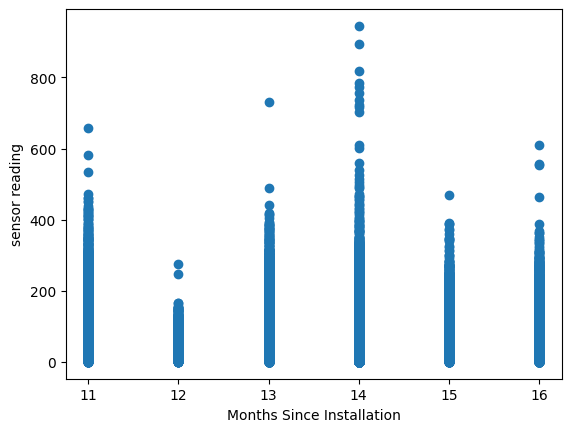

In [ ]:
plt.scatter(X['Months since installation'], X['Sensor_reading'])  # Replace 'IITK01' with any column you want to plot against the x-axis
plt.xlabel('Months Since Installation')
plt.ylabel('sensor reading')  # Replace 'IITK01' with the corresponding y-axis label
plt.show()

In [ ]:
X.columns

Index(['PM_Day', 'PM_Hour', 'PM_Month', 'Sensor', 'Sensor_reading', 'S.No',
       'Serial No.', 'Location', 'Latitude', 'Longitude',
       'Date of Installation', 'Months since installation'],
      dtype='object')

In [ ]:
X = X.drop(['Sensor','S.No','Serial No.', 'Location','Date of Installation'],axis = 1)
X

,PM_Day,PM_Hour,PM_Month,Sensor_reading,Latitude,Longitude,Months since installation
0,9,0,1,10.00,26.77917,80.885063,16
1,9,1,1,10.00,26.77917,80.885063,16
2,9,2,1,11.50,26.77917,80.885063,16
3,9,3,1,NaN,26.77917,80.885063,16
4,9,4,1,NaN,26.77917,80.885063,16
...,...,...,...,...,...,...,...
154917,30,19,11,303.25,26.90660,80.969386,14
154918,30,20,11,224.00,26.90660,80.969386,14
154919,30,21,11,181.50,26.90660,80.969386,14
154920,30,22,11,220.00,26.90660,80.969386,14


In [ ]:
X = X.dropna(subset=['Sensor_reading'])
X

,PM_Day,PM_Hour,PM_Month,Sensor_reading,Latitude,Longitude,Months since installation
0,9,0,1,10.000000,26.77917,80.885063,16
1,9,1,1,10.000000,26.77917,80.885063,16
2,9,2,1,11.500000,26.77917,80.885063,16
5,9,7,1,13.750000,26.77917,80.885063,16
6,9,8,1,11.333333,26.77917,80.885063,16
...,...,...,...,...,...,...,...
154917,30,19,11,303.250000,26.90660,80.969386,14
154918,30,20,11,224.000000,26.90660,80.969386,14
154919,30,21,11,181.500000,26.90660,80.969386,14
154920,30,22,11,220.000000,26.90660,80.969386,14


In [ ]:
Y = X['Sensor_reading']
Y

0          10.000000
1          10.000000
2          11.500000
5          13.750000
6          11.333333
             ...    
154917    303.250000
154918    224.000000
154919    181.500000
154920    220.000000
154921    166.750000
Name: Sensor_reading, Length: 115066, dtype: float64

In [ ]:
X = X.drop('Sensor_reading', axis=1)
X

,PM_Day,PM_Hour,PM_Month,Latitude,Longitude,Months since installation
0,9,0,1,26.77917,80.885063,16
1,9,1,1,26.77917,80.885063,16
2,9,2,1,26.77917,80.885063,16
5,9,7,1,26.77917,80.885063,16
6,9,8,1,26.77917,80.885063,16
...,...,...,...,...,...,...
154917,30,19,11,26.90660,80.969386,14
154918,30,20,11,26.90660,80.969386,14
154919,30,21,11,26.90660,80.969386,14
154920,30,22,11,26.90660,80.969386,14


In [ ]:
dummies = pd.get_dummies(X['PM_Day'],prefix='PM_Day')
X = pd.concat([X,dummies],axis=1)
X.drop(['PM_Day'],axis = 1 , inplace=True)
X

,PM_Hour,PM_Month,Latitude,Longitude,Months since installation,PM_Day_9,PM_Day_10,PM_Day_11,PM_Day_13,PM_Day_14,...,PM_Day_22,PM_Day_23,PM_Day_24,PM_Day_25,PM_Day_26,PM_Day_27,PM_Day_28,PM_Day_29,PM_Day_30,PM_Day_31
0,0,1,26.77917,80.885063,16,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,26.77917,80.885063,16,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1,26.77917,80.885063,16,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,7,1,26.77917,80.885063,16,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,8,1,26.77917,80.885063,16,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154917,19,11,26.90660,80.969386,14,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
154918,20,11,26.90660,80.969386,14,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
154919,21,11,26.90660,80.969386,14,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
154920,22,11,26.90660,80.969386,14,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
dummies = pd.get_dummies(X['PM_Hour'],prefix='PM_Hour')
X = pd.concat([X,dummies],axis=1)
X.drop(['PM_Hour'],axis = 1 , inplace=True)

In [ ]:
dummies = pd.get_dummies(X['PM_Month'],prefix='PM_Month')
X = pd.concat([X,dummies],axis=1)
X.drop(['PM_Month'],axis = 1 , inplace=True)

In [ ]:
X

,Latitude,Longitude,Months since installation,PM_Day_9,PM_Day_10,PM_Day_11,PM_Day_13,PM_Day_14,PM_Day_15,PM_Day_16,...,PM_Month_3,PM_Month_4,PM_Month_5,PM_Month_6,PM_Month_7,PM_Month_8,PM_Month_9,PM_Month_10,PM_Month_11,PM_Month_12
0,26.77917,80.885063,16,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,26.77917,80.885063,16,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,26.77917,80.885063,16,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,26.77917,80.885063,16,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,26.77917,80.885063,16,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154917,26.90660,80.969386,14,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
154918,26.90660,80.969386,14,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
154919,26.90660,80.969386,14,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
154920,26.90660,80.969386,14,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split( X,Y, test_size=0.25, random_state=42)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(86299, 61) (28767, 61) (86299,) (28767,)


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled[0]

array([ 0.46431072, -0.01353409,  0.13404784, -0.38397982, -0.40293221,
        2.57219472, -0.18446866, -0.18925084, -0.1905608 , -0.18115165,
       -0.18737052, -0.18173083, -0.18426707, -0.18043396, -0.18667364,
       -0.18743677, -0.18737052, -0.18826321, -0.18278286, -0.18389699,
       -0.18029697, -0.17673761, -0.1798168 , -0.17847323, -0.10645285,
       -0.2090647 ,  4.80545591, -0.20912507, -0.20912507, -0.20715555,
       -0.2065464 , -0.20861146, -0.2079149 , -0.20849046, -0.2103895 ,
       -0.20912507, -0.20706428, -0.20688162, -0.20849046, -0.20773287,
       -0.20666835, -0.20803618, -0.2065464 , -0.20861146, -0.21140849,
       -0.20897412, -0.21119903, -0.20993865, -0.2090647 , -0.18667364,
       -0.18756921, -0.18756921, -0.18740364, -0.1821387 , -0.18104928,
       -0.18597452,  5.31357494, -0.57287674, -0.5595101 , -0.52231127,
       -0.18500529])

In [ ]:
# Define the input shape of the model
input_shape = X_train_scaled.shape[1]

# Define the model architecture
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(input_shape,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mean_absolute_error')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                3968      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 6,081
Trainable params: 6,081
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Train the model
history = model.fit(X_train_scaled, Y_train, epochs=50, batch_size=32, validation_split = 0.1)

Epoch 1/50
2428/2428 [==============================] - 9s 3ms/step - loss: 18.9624 - val_loss: 14.4617
Epoch 2/50
2428/2428 [==============================] - 7s 3ms/step - loss: 13.8036 - val_loss: 13.2030
Epoch 3/50
2428/2428 [==============================] - 8s 3ms/step - loss: 12.9623 - val_loss: 12.5511
Epoch 4/50
2428/2428 [==============================] - 8s 3ms/step - loss: 12.5064 - val_loss: 12.5174
Epoch 5/50
2428/2428 [==============================] - 8s 3ms/step - loss: 12.2335 - val_loss: 12.1108
Epoch 6/50
2428/2428 [==============================] - 8s 3ms/step - loss: 12.0222 - val_loss: 11.9137
Epoch 7/50
2428/2428 [==============================] - 8s 3ms/step - loss: 11.8758 - val_loss: 11.8919
Epoch 8/50
2428/2428 [==============================] - 7s 3ms/step - loss: 11.7571 - val_loss: 11.7006
Epoch 9/50
2428/2428 [==============================] - 8s 3ms/step - loss: 11.6555 - val_loss: 11.6812
Epoch 10/50
2428/2428 [==============================] - 8s 3ms/

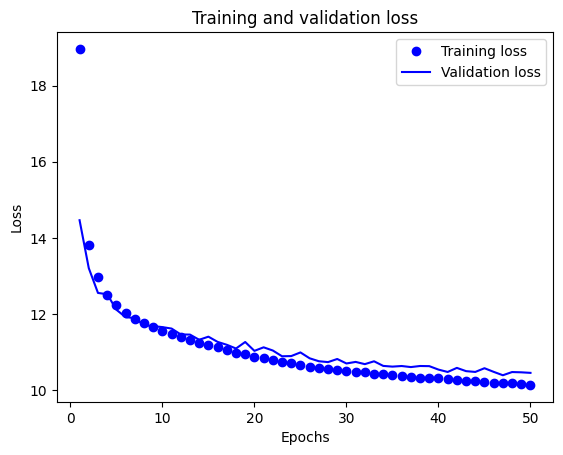

In [ ]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
# Evaluate the model on the test set
test_loss = model.evaluate(X_test_scaled, Y_test)

899/899 [==============================] - 2s 2ms/step - loss: 10.6636


In [ ]:
y_pred = model.predict(X_test_scaled)
y_pred

899/899 [==============================] - 1s 1ms/step


array([[  8.595921],
       [ 59.04234 ],
       [137.95552 ],
       ...,
       [ 13.932645],
       [ 15.573187],
       [ 43.115376]], dtype=float32)

In [ ]:
Y_test

153553     29.50
37854      75.50
88762     122.25
78393     125.00
144834      8.25
           ...  
137602     31.00
68981     378.25
22206      13.00
144633     16.75
109857     29.25
Name: Sensor_reading, Length: 28767, dtype: float64

In [ ]:
y_pred = y_pred.ravel()
y_pred.shape

(28767,)

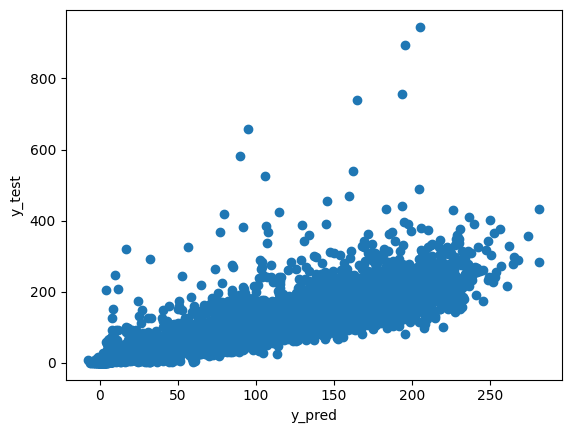

In [ ]:
plt.scatter(y_pred, Y_test)  # Replace 'IITK01' with any column you want to plot against the x-axis
plt.xlabel('y_pred')
plt.ylabel('y_test')  # Replace 'IITK01' with the corresponding y-axis label
plt.show()

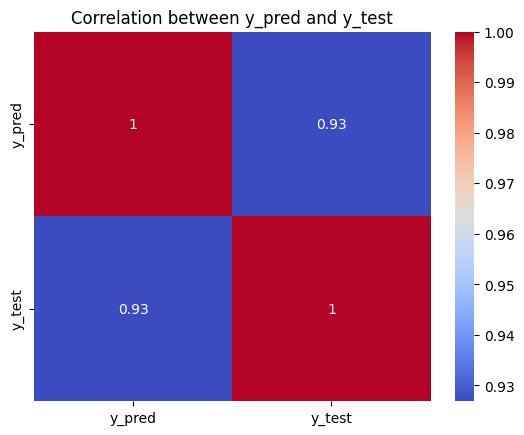

In [ ]:
# Create a dataframe with the predicted and actual values
df = pd.DataFrame({'y_pred': y_pred, 'y_test': Y_test})

# Compute the correlation matrix
corr = df.corr()

# Create a heatmap of the correlation matrix using seaborn
sns.heatmap(corr, annot=True, cmap='coolwarm')

# Set the title and display the plot
plt.title('Correlation between y_pred and y_test')
plt.show()


In [ ]:
# svm_reg = SVR(kernel='rbf', C=10, gamma=0.1, epsilon=0.1)

# svm_reg.fit(X_train_scaled, Y_train)

# # Make predictions on test data
# Y_pred = svm_reg.predict(X_test)

# # Evaluate the model performance using mean squared error
# mse = mean_squared_error(Y_test, Y_pred)
# print("Mean Squared Error: ", mse)


In [ ]:
# create a linear regression object
lr = LinearRegression()

# fit the model to the training data
lr.fit(X_train_scaled, Y_train)

# predict on the test data
y_pred = lr.predict(X_test_scaled)

# calculate the mean squared error
mse = mean_absolute_error(Y_test, y_pred)
print('Mean Absolute Error:', mse)


Mean Absolute Error: 25.07752182671754
